$\Large\textbf{Lab 3.}$ $\large\textbf{Exercise 1.}$



In the last lab, when we tried to solve certain problems of the form $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$ using gradient descent algorithm, we noticed that the algorithm needed a large number of iterations to find the minimizer. Today we will discuss some remedy measures for this issue.  

Consider the problem $\min_{\mathbf{x}} f(\mathbf{x}) = 1500x_1^2 + 4x_1 x_2 +  x_2^2$. 

$\textbf{Question:}$ Write code to find the Hessian matrix of the function $f(\mathbf{x}) = 1500x_1^2 + 4x_1 x_2 +  x_2^2$ and its condition number. 

In [68]:
import numpy as np 
import matplotlib.pyplot as plt #package useful for plotting


#method to find Hessian matrix: Complete the code
def evalh(x): 
  assert type(x) is np.ndarray 
  assert len(x) == 2
  return np.array([[3000,4],[4,2]])

#method to find the condition number of any square matrix: : Complete the code
def find_condition_number(A):
  assert type(A) is np.ndarray
  assert A.shape[0] == A.shape[1]
  return np.cond()

$\textbf{Question:}$ Based on our discussion on condition number and the derivation of the gradient descent scheme with scaling, can you identify and write down the matrix $\mathbf{Q}$ whose condition number needs to be analyzed in the new gradient scheme with scaling? 

#Solution:
The matrix Q whose condition number needs to be analyzed can be taken to be $\nabla^2_y f(y)$ = $\mathbf{M}^\top \nabla^2_x f(x) \mathbf{M}$ where $\nabla^2f(x)$ is the Hessian of the function f(x) and $\mathbf{M} = \mathbf{D}^{\frac{1}{2}}$.


$\textbf{Question:}$ Based on the matrix $\mathbf{Q}$, can you come up with a useful choice for $\mathbf{D}^k$ (assuming $\mathbf{D}^k$ to be diagonal)?

$\textbf{Your Answer:}$he diagonal approximation is the inverse of $\nabla^2 f(\mathbf{x})$ (Hessian of the function f(X)) its is following are

$\begin{bmatrix} \frac{1}{3000} & 0\\ 0 & \frac{1}{2} \end{bmatrix}$
 



Write code to find the matrix $\mathbf{D}^k$. 

In [69]:
#The method defines a way to construct D_k matrix used in scaling the gradient in the modified gradient descent scheme
def compute_D_k(x):
  return np.array([[1/3000, 0], [0, 1/2]])
  

In [70]:
#Now we will define a Python function which will compute and return the objective function value 
def evalf(x):   
  return 1500*(x[0]**2) + (4*x[0]*x[1]) + x[1]**2


In [71]:
#Now we will define a Python function which will compute and return the gradient value as a numpy array 
def evalg(x):   
  return np.array([(3000*x[0]) + (4*x[1]), (4*x[0])+(2*x[1])]) 

In [72]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_exact(x, gradf, A,): #add appropriate arguments to the function 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(A) is np.ndarray and A.shape[0] == 2 and  A.shape[1] == 2 #allow only a 2x2 array
   
  #Complete the code 
  num = np.dot(np.dot(x.T, A), gradf) + np.dot(np.dot(gradf.T, A), x)
  den = 2*np.dot(np.dot(gradf.T, A), gradf)
  step_length = num/den
    
  return step_length 

In [73]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma, *args): #add appropriate arguments to the function  
  alpha = alpha_start
  pk = -gradf
  while evalf(np.add(x, alpha*pk)) > np.add(evalf(x), gamma*alpha*np.dot(gradf.T,pk)):
    alpha = rho*alpha
  return alpha
  

In [74]:
def compute_steplength_backtracking_scaled_direction(x, gradf, direction, alpha_start, rho, gamma, *args): #add appropriate arguments to the function 
  alpha = alpha_start
  pk = -gradf
  while evalf(np.add(x, alpha*np.dot(direction,pk))) > np.subtract(evalf(x), gamma*alpha*np.dot(np.dot(direction,gradf), gradf)):
    alpha = rho*alpha
  return alpha

In [75]:
#line search type 
EXACT_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3

In [76]:
#complete the code for gradient descent to find the minimizer

def find_minimizer_gd(start_x, tol, line_search_type, *args):
    A = np.array([[1500,2],[2,1]])
    x = start_x
    g_x = evalg(x)

    #initialization for backtracking line search
    if(line_search_type == BACKTRACKING_LINE_SEARCH):
        alpha_start = args[0]
        rho = args[1]
        gamma = args[2]
        # print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

    k = 0
    #   print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

    while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    
        if line_search_type == EXACT_LINE_SEARCH:
            step_length = compute_steplength_exact(x, g_x, A) #call the new function you wrote to compute the steplength
        elif line_search_type == BACKTRACKING_LINE_SEARCH:
            step_length = compute_steplength_backtracking(x,g_x, alpha_start,rho, gamma) #call the new function you wrote to compute the steplength
        else:  
            raise ValueError('Line search type unknown. Please check!')
        
        #implement the gradient descent steps here   
        x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
        k += 1 #increment iteration
        g_x = evalg(x) #compute gradient at new point

        # print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
    return x, evalf(x), k 
 

In [77]:
# Code for gradient descent with scaling to find the minimizer with scaling

def find_minimizer_gdscaling(start_x, tol, line_search_type, *args):
    A = np.array([[1500,2],[2,1]])
    x = start_x
    g_x = evalg(x)
    d_k = compute_D_k(x)

    #initialization for backtracking line search
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    # print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

    k = 0
    #   print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

    while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
        if line_search_type == BACKTRACKING_LINE_SEARCH:
            step_length = compute_steplength_backtracking_scaled_direction(x, g_x, d_k, alpha_start, rho, gamma) #call the new function you wrote to compute the steplength
        else:  
            raise ValueError('Line search type unknown. Please check!')
        
        #implement the gradient descent steps here   
        x = np.subtract(x, np.multiply(step_length,np.dot(d_k, g_x))) #update x = x - step_length*g_x
        k += 1 #increment iteration
        g_x = evalg(x) #compute gradient at new point

        # print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
    return x, evalf(x), k 
 

#7. [R] Note down the minimizer and minimum function value of f(x) = 1500x1^2 + 4x1x2 + x2^2
.


#Solution:minimizer is [0,0] and the minimum function value is 0

#8. [R] With starting point x0 = (1, 4000) and a stopping tolerance τ = 10^-12, find the number of iterations takenby the gradient descent algorithm (without scaling) with exact line search, gradient descent algorithm (withoutscaling) with backtracking line search, gradient descent algorithm (with scaling) with backtracking line search.For backtracking line search, use α0 = 1, ρ = 0.5, γ = 0.5. Note the minimizer and minimum objective functionvalue in each case. Comment on your observations.


#Solution:Gradient descent with exact line search

Minimizer = [-7.44595231e-16 4.61544291e-13]

Minimum function value = 2.124801107784775e-25

Number of iterations = 14075

#Gradient descent with backtracking line search without scaling

Minimizer = [-4.78532202e-16 4.53575301e-13]

Minimum function value = 2.0520584176089396e-25

Number of iterations = 21985

#Gradient descent with backtracking line search with scaling

Minimizer = [-2.31674405e-18 9.60515434e-16]

Minimum function value = 9.217397790469283e-31

Number of iterations = 16



among these three the Gradient descent with backtracking line search with scaling have less number of iterations and more closure to optimal value 

In [78]:
my_start_x = np.array([1.,4000.])
my_tol= 1e-12

In [79]:
x_optimal, f_optimal, iteration= find_minimizer_gd(my_start_x, my_tol, EXACT_LINE_SEARCH)
print("Minimizer :", x_optimal)
print("Minimum function value:", f_optimal)
print("Number of iterations :", iteration)

Minimizer : [-7.44595231e-16  4.61544291e-13]
Minimum function value: 2.124801107784775e-25
Number of iterations : 14075


In [80]:
#check gradient descent with backtracking line search without scaling
alpha_start = 1.
rho = 0.5
gamma = 0.5

x_opt_bls, f_opt_bls, iteration_bls = find_minimizer_gd(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha_start, rho, gamma)
print("Minimizer :", x_opt_bls)
print("Minimum function value :", f_opt_bls)
print("Number of iterations :", iteration_bls)

Minimizer : [-4.78532202e-16  4.53575301e-13]
Minimum function value : 2.0520584176089396e-25
Number of iterations : 21985


In [81]:
#check gradient descent with scaling and backtracking line search 
alpha_start = 1.
rho = 0.5
gamma = 0.5

x_opt_bls_scaling, f_bls_opt_scaling, iteration_bls_scaling = find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha_start, rho, gamma)
print("Minimizer :", x_opt_bls_scaling)
print("Minimum function value :", f_bls_opt_scaling)
print("Number of iterations :", iteration_bls_scaling)

Minimizer : [-2.31674405e-18  9.60515434e-16]
Minimum function value : 9.217397790469283e-31
Number of iterations : 16


#9. [R] With starting point x0 = (1, 4000) and τ = 10−12, we will now study the behavior of gradient descent algorithm (without scaling) with backtracking line search, gradient descent algorithm (with scaling) with backtracking line search, for different choices of α0. Take γ = ρ = 0.5. Try α0 ∈ {1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01}.For each α0, record the final minimizer, final objective function value and number of iterations to terminate,for the gradient descent algorithm (without scaling) with backtracking line search and the gradient descentalgorithm (with scaling) with backtracking line search. Prepare a plot where the number of iterations forboth the algorithms are plotted against α0 values. Use different colors and a legend to distinguish the plotscorresponding to the different algorithms. Comment on the observations. Comment about the minimizers andobjective function values obtained for different choices of the α0 values for the two algorithms.


#Solution.number of iterations in backtraking line search(with scaling) is less than backtraking line search without scaling ,with scaling it more close to the minimizer and optmal value of the function ,number of alpha value increses corresponding the  number of iteration in  some interval they are increses and in  some interaval they decrese(with scaling),number of alpha values increses corresponding the number of iteration are decrese(without scaling)

In [82]:
my_start_x = np.array([1.,4000.])
my_tol= 1e-12
alpha=[1., 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
rho=0.5
gamma=0.5

In [83]:
iteration1=[]
for i in alpha:
  x_opt_bls, f_opt_bls, iteration_bls= find_minimizer_gd(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, i, rho,gamma)
  iteration1.append(iteration_bls)
  print("Alpha:",i,"Minimizer:", x_opt_bls,"Minimum function value:", f_opt_bls, "Number of iterations", iteration_bls)

Alpha: 1.0 Minimizer: [-4.78532202e-16  4.53575301e-13] Minimum function value: 2.0520584176089396e-25 Number of iterations 21985
Alpha: 0.9 Minimizer: [-5.48799355e-16  4.71515450e-13] Minimum function value: 2.2174352131747877e-25 Number of iterations 15941
Alpha: 0.75 Minimizer: [-7.18643891e-16  4.89175378e-13] Minimum function value: 2.386610528547938e-25 Number of iterations 6750
Alpha: 0.6 Minimizer: [-6.07554226e-16  4.94036636e-13] Minimum function value: 2.43425264283868e-25 Number of iterations 6887
Alpha: 0.5 Minimizer: [-4.78532202e-16  4.53575301e-13] Minimum function value: 2.0520584176089396e-25 Number of iterations 21985
Alpha: 0.4 Minimizer: [-7.24091328e-16  4.84454819e-13] Minimum function value: 2.3407977615582728e-25 Number of iterations 11362
Alpha: 0.25 Minimizer: [-4.78532202e-16  4.53575301e-13] Minimum function value: 2.0520584176089396e-25 Number of iterations 21985
Alpha: 0.1 Minimizer: [-7.24091328e-16  4.84454819e-13] Minimum function value: 2.34079776155

In [84]:
iteration2=[]
for i in alpha:
  x_opt_bls_scaling, f_bls_scaling, iter_bls_scaling = find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, i, rho, gamma)
  iteration2.append(iter_bls_scaling)
  print("Alpha:",i,"Minimizer:", x_opt_bls_scaling,"Minimum function value:", f_bls_scaling, "Number of iterations",iter_bls_scaling)

Alpha: 1.0 Minimizer: [-2.31674405e-18  9.60515434e-16] Minimum function value: 9.217397790469283e-31 Number of iterations 16
Alpha: 0.9 Minimizer: [-1.54825431e-16  5.99636318e-15] Minimum function value: 6.819918471923904e-29 Number of iterations 21
Alpha: 0.75 Minimizer: [-2.78273450e-16  1.07784868e-14] Minimum function value: 2.203324807217381e-28 Number of iterations 32
Alpha: 0.6 Minimizer: [-3.37385169e-16  1.30849588e-14] Minimum function value: 3.2430059206322154e-28 Number of iterations 47
Alpha: 0.5 Minimizer: [-2.51144512e-16  9.75949896e-15] Minimum function value: 1.800539902805011e-28 Number of iterations 62
Alpha: 0.4 Minimizer: [-3.26530890e-16  1.27315971e-14] Minimum function value: 3.0539815808527928e-28 Number of iterations 83
Alpha: 0.25 Minimizer: [-2.68853026e-16  1.05480788e-14] Minimum function value: 2.0834135979657747e-28 Number of iterations 147
Alpha: 0.1 Minimizer: [-3.34815103e-16  1.32481337e-14] Minimum function value: 3.2592207464795465e-28 Number of

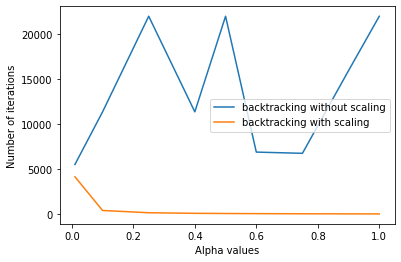

In [85]:
plt.plot(alpha, iteration1, label = 'backtracking without scaling')
plt.plot(alpha, iteration2, label = 'backtracking with scaling')
plt.ylabel('Number of iterations')
plt.xlabel('Alpha values')
plt.legend()
plt.show()

#10. [R] With starting point x0 = (1, 4000) and τ = 10−12, we will now study the behavior of gradient descent algorithm (without scaling) with backtracking line search, gradient descent algorithm (with scaling) with backtracking line search, for different choices of ρ. Take α = 1, γ = 0.5. Try ρ ∈ {0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01}.For each ρ, record the final minimizer, final objective function value and number of iterations to terminate,for the gradient descent algorithm (without scaling) with backtracking line search and the gradient descentalgorithm (with scaling) with backtracking line search. Prepare a plot where the number of iterations forboth the algorithms are plotted against ρ values. Use different colors and a legend to distinguish the plotscorresponding to the different algorithms. Comment on the observations. Comment about the minimizers andobjective function values obtained for different choices of the ρ values for both the algorithms.


#Solution:minimum number of iteration is 14 at rho value of 0.9 which is more close to the optimal solution than other value of rho(with scaling),number of iteration are equale in all rho value (without scaling),number of rho value increses corresponding number of iterations are decrese(with scaling)

In [95]:
my_start_x = np.array([1,4000])
my_tol= 1e-12
rho=[0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
alpha=1.
gamma=0.5

In [94]:
iteration3=[]
for i in rho:
  x_opt_bls, f_bls, iter_bls = find_minimizer_gd(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha, i, gamma)
  iteration3.append(iter_bls)
  print("rho:",i,"Minimizer:", x_opt_bls,"Minimum function value:", f_opt_bls, "Number of iterations", iteration_bls)

rho: 0.9 Minimizer: [-6.44686128e-16  4.90962904e-13] Minimum function value: 2.3601891237044125e-25 Number of iterations 5509
rho: 0.75 Minimizer: [-7.15454842e-16  4.83616543e-13] Minimum function value: 2.3601891237044125e-25 Number of iterations 5509
rho: 0.6 Minimizer: [-7.07691748e-16  4.70469643e-13] Minimum function value: 2.3601891237044125e-25 Number of iterations 5509
rho: 0.5 Minimizer: [-4.78532202e-16  4.53575301e-13] Minimum function value: 2.3601891237044125e-25 Number of iterations 5509
rho: 0.4 Minimizer: [-5.16461460e-16  4.67846629e-13] Minimum function value: 2.3601891237044125e-25 Number of iterations 5509
rho: 0.25 Minimizer: [-5.67128954e-16  4.70177132e-13] Minimum function value: 2.3601891237044125e-25 Number of iterations 5509
rho: 0.1 Minimizer: [-4.35224428e-16  4.42644725e-13] Minimum function value: 2.3601891237044125e-25 Number of iterations 5509
rho: 0.01 Minimizer: [-6.03891924e-16  4.89972672e-13] Minimum function value: 2.3601891237044125e-25 Number 

In [96]:
iteration4=[]
for i in rho:
  x_opt_bls_scaling, f_bls_scaling, iter_bls_scaling = find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha, i, gamma)
  iteration4.append(iter_bls_scaling)
  print("rho:",i,"Minimizer:", x_opt_bls_scaling,"Minimum function value:", f_bls_scaling, "Number of iterations",iter_bls_scaling)

rho: 0.9 Minimizer: [-1.90920422e-16  3.38018326e-15] Minimum function value: 6.352016622002106e-29 Number of iterations 14
rho: 0.75 Minimizer: [-3.59593964e-18  9.57478862e-16] Minimum function value: 9.223897999650174e-31 Number of iterations 15
rho: 0.6 Minimizer: [-2.68496827e-18  1.53311688e-15] Minimum function value: 2.3447954703965872e-30 Number of iterations 15
rho: 0.5 Minimizer: [-2.31674405e-18  9.60515434e-16] Minimum function value: 9.217397790469283e-31 Number of iterations 16
rho: 0.4 Minimizer: [-2.10920879e-18  1.38155681e-15] Minimum function value: 1.903716407388883e-30 Number of iterations 16
rho: 0.25 Minimizer: [-6.9534609e-16  4.5561674e-13] Minimum function value: 2.0704462793405916e-25 Number of iterations 16
rho: 0.1 Minimizer: [-6.22892805e-16  4.51919078e-13] Minimum function value: 2.0368685744853975e-25 Number of iterations 23
rho: 0.01 Minimizer: [-5.88632151e-16  4.39928337e-13] Minimum function value: 1.9302084997635662e-25 Number of iterations 130


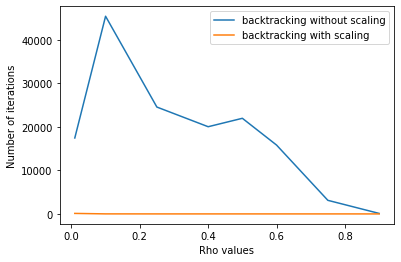

In [97]:
#we will plot the function values and check the behavior
plt.plot(rho, iteration3, label = 'backtracking without scaling')
plt.plot(rho, iteration4, label = 'backtracking with scaling')
plt.ylabel('Number of iterations')
plt.xlabel('Rho values')
plt.legend()
plt.show()